In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mean GC content of cells (barplot)

In [2]:
names = ["Strand-seq", "OP-Strand-seq", "NanoStrand-seq"]
array = []
for name in names:
    d = pd.read_csv("results/%s.qc_pass.tsv" % name, sep="\t")
    rows = []
    for run, cell, gc in d[["Run", "Cell", "GC.Mean"]].values:
        rows.append([name, cell, gc])
    df = pd.DataFrame(rows)
    df.columns = ["Name", "Cell", "GC"]
    array.append(df)

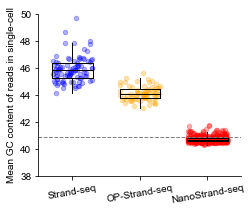

In [3]:
np.random.seed(0)
colors = ["blue", "orange", "red"]
plt.figure(figsize=(3.6, 3))
w = 0.6
for x, dat in enumerate(array):
    ys = dat["GC"] * 100
    plt.boxplot([ys], positions=[x], widths=w, 
                showfliers=False, showcaps=False,
                medianprops={"color": "black"}, zorder=10)
    xs = np.random.random(len(ys)) * w - w/2 + x
    plt.scatter(xs, ys, marker="o", s=20, color=colors[x], alpha=0.3, clip_on=False)
plt.xticks(np.arange(3), names, rotation=10)
plt.ylim(38, 50)
plt.yticks(np.arange(38, 50 + 1, 2))
plt.axhline(40.9, ls="--", lw=1, color="grey")
plt.ylabel("Mean GC content of reads in single-cell")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/cell_gc_content.pdf", dpi=300)

# Density of GC content-specific windows

Strand-seq	94
OP-Strand-seq	74
NanoStrand-seq	364
NanoStrand-seq.MM	206


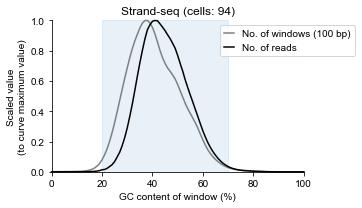

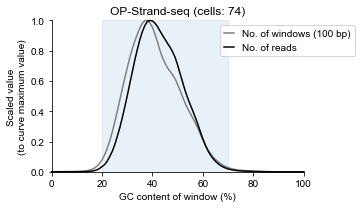

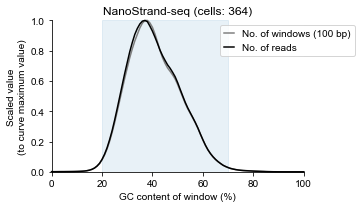

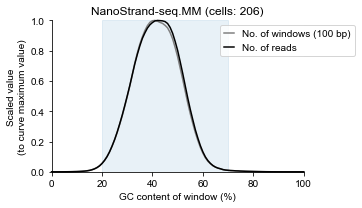

In [6]:
names = ["Strand-seq", "OP-Strand-seq", "NanoStrand-seq", "NanoStrand-seq.MM"]

data = dict()
for i, name in enumerate(names):
    info = pd.read_csv("results/%s.qc_pass.tsv" % name, sep="\t")
    ds = []
    for run, cell in info[["Run", "Cell"]].values:
        if name.startswith("NanoStrand-seq"):
            path = "../../1_NanoStrandSeq/results/stat/gc_density/%s/%s.tsv" % (run, cell)
        else:
            path = "../../2_StrandSeq/results/stat/gc_density/%s/%s.tsv" % (run, cell)
        ds.append(pd.read_csv(path, sep="\t", index_col=0))
    print(name, len(ds), sep="\t")
    if len(ds) == 0:
        continue
    df = ds[0].copy()
    for d in ds[1:]:
        df["Reads"] += d["Reads"]
    df["Density"] = df["Reads"] / df["Windows"]
    data[name] = df
    xs = np.arange(len(df))

    plt.figure(figsize=(5, 3))
    plt.title("%s (cells: %d)" % (name, len(ds)))
    plt.plot(xs, df["Windows"] / max(df["Windows"]), color="C7", label="No. of windows (100 bp)", clip_on=False)
    plt.plot(xs, df["Reads"] / max(df["Reads"]), color="black", label="No. of reads", clip_on=False)
    # plt.plot(xs, df["Density"] / max(df["Density"]), color="C9", label="Reads / windows")
    # plt.text(70, 0.95, "Cells=%d" % len(ds))
    plt.axvspan(20, 70, alpha=0.1, color="C0")
    plt.xlim(0, 100)
    plt.ylim(0, 1)
    plt.xlabel("GC content of window (%)")
    plt.ylabel("Scaled value\n(to curve maximum value)")
    plt.legend(loc="upper left", bbox_to_anchor=(0.65, 1), handlelength=1)
    for loc in ["top", "right"]:
        plt.gca().spines[loc].set_visible(False)
    plt.tight_layout()
    plt.savefig("figures/gc_density.%s.pdf" % name, dpi=300)

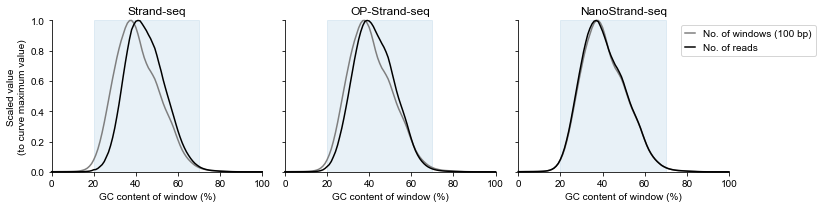

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(11.6, 3), sharex=True, sharey=True)
for i, name in enumerate(names[:3]):
    plt.sca(axs[i])
    df = data[name]
    plt.title(name)
    plt.plot(xs, df["Windows"] / max(df["Windows"]), color="C7", label="No. of windows (100 bp)", clip_on=False)
    plt.plot(xs, df["Reads"] / max(df["Reads"]), color="black", label="No. of reads", clip_on=False)
    # plt.plot(xs, df["Density"] / max(df["Density"]), color="red", label="Reads / windows", clip_on=False)
    plt.axvspan(20, 70, alpha=0.1, color="C0")
    plt.xlim(0, 100)
    plt.ylim(0, 1)
    plt.xlabel("GC content of window (%)")
    if i == 0:
        plt.ylabel("Scaled value\n(to curve maximum value)")
    if i == 2:
        plt.legend(loc="upper left", bbox_to_anchor=(0.75, 1), frameon=True, handlelength=1)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/gc_density.comparison.pdf", dpi=300)

GC value of peak density: 52 (Strand-seq)
GC value of peak density: 47 (OP-Strand-seq)
GC value of peak density: 31 (NanoStrand-seq)


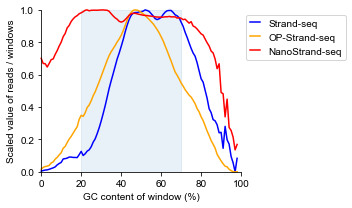

In [8]:
plt.figure(figsize=(5, 3))
for name, df in data.items():
    if name == "NanoStrand-seq.MM":
        continue
    ys = df["Density"]
    xs = np.arange(len(ys))
    if name == "NanoStrand-seq":
        color = "red"
    elif name == "NanoStrand-seq.MM":
        color = "C1"
    elif name == "Strand-seq":
        color = "blue"
    elif name == "OP-Strand-seq":
        color = "orange"
    else:
        assert False
        # color = "orange"
    plt.plot(xs, ys / max(ys), label=name, color=color, clip_on=False)
    print("GC value of peak density: %d (%s)" %(list(ys).index(max(ys)), name))
plt.axvspan(20, 70, alpha=0.1, color="C0")
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel("GC content of window (%)")
plt.ylabel("Scaled value of reads / windows")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), handlelength=1, frameon=True)
plt.tight_layout()
plt.savefig("figures/gc_density.reads_per_window.pdf", dpi=300)